# Importação e carregamento dos dados

In [1]:
!pip install category_encoders

# Tratamento de dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Não exisbir warnings
import warnings
warnings.filterwarnings("ignore")

# Fazendo o ggplot ser o estilo padrao de todos os plots
plt.style.use('ggplot')

# Configurar para exibir ate 15 linhas de um DF em pandas e para mostrar todas as colunas
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

In [2]:
churn = pd.read_csv('Churn Modeling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn.shape

(10000, 14)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Preprocessamento

In [6]:
churn.drop(columns=['RowNumber', 'CustomerId'],inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

X = churn.drop(['Exited'], axis=1)
y = churn['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8500, 11), (1500, 11), (8500,), (1500,))

In [9]:
X_train

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8701,Onio,673,France,Male,37,2,0.00,1,1,1,13624.02
3429,Bradley,731,Germany,Female,43,9,79120.27,1,0,0,548.52
8870,Clark,668,France,Male,42,8,187534.79,1,1,1,32900.41
6962,Fraser,677,Germany,Female,26,3,102395.79,1,1,0,119368.99
2088,Nnaife,595,Germany,Female,41,9,150463.11,2,0,1,81548.38
...,...,...,...,...,...,...,...,...,...,...,...
5734,Henderson,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,Chukwualuka,682,France,Female,58,1,0.00,1,1,1,706.50
5390,Macrossan,735,France,Female,38,1,0.00,3,0,0,92220.12
860,McGregor,667,France,Male,43,8,190227.46,1,1,0,97508.04


In [10]:
# Depois fazer uma analise mais aprofundada se tem alguma coluna que está como float ou int mas na verdade representa uma categoria
# Talvez dividir as cvategiricas em orginal  categorica
categorical_features = ['Surname', 'Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [57]:
from category_encoders import BinaryEncoder
from sklearn.discriminant_analysis import StandardScaler


numerical_pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ('cat_encoder', BinaryEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical_features),
    ('cat', categorical_pipe, categorical_features),
])

# Random Forest

## Fit

In [58]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', RandomForestClassifier()) # Testar outro modelo e tunar os parametros
])

In [59]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly_features',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   BinaryEncoder())]),
                                                  ['Surname', 'Geography',
                                                   'Gender'])])),
                ('classificador', RandomForestClassifier())])

## Metrics

In [60]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, f1_score, recall_score

y_pred = model.predict(X_test)

print(f'Acurracia: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')
print(f'Preision: {precision_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')

Acurracia: 0.8666666666666667
F1-score: 0.5726495726495726
Preision: 0.7657142857142857
recall: 0.45733788395904434


In [61]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred)) # Aumentar ou diminuir a certeza com base na matriz de confusao

Matriz de confusão: 
 [[1166   41]
 [ 159  134]]


Como estamos tratando de um caso de churn, vamos nos perguntar o seguinte:

- É pior falarmos que uma pessoa vai dar churn e na realidade ela não iria?
- Ou é pior falar que uma pessoa não vai dar churn e na verdade ela vai dar?

Logicamente, o segundo é maior importantes, então temos que diminuir os Falsos negativos, ou seja, devemos focar em aumentar o recall em detrimento do precision

- Podemos tentar diminuir a certeza com que um registro é classificado

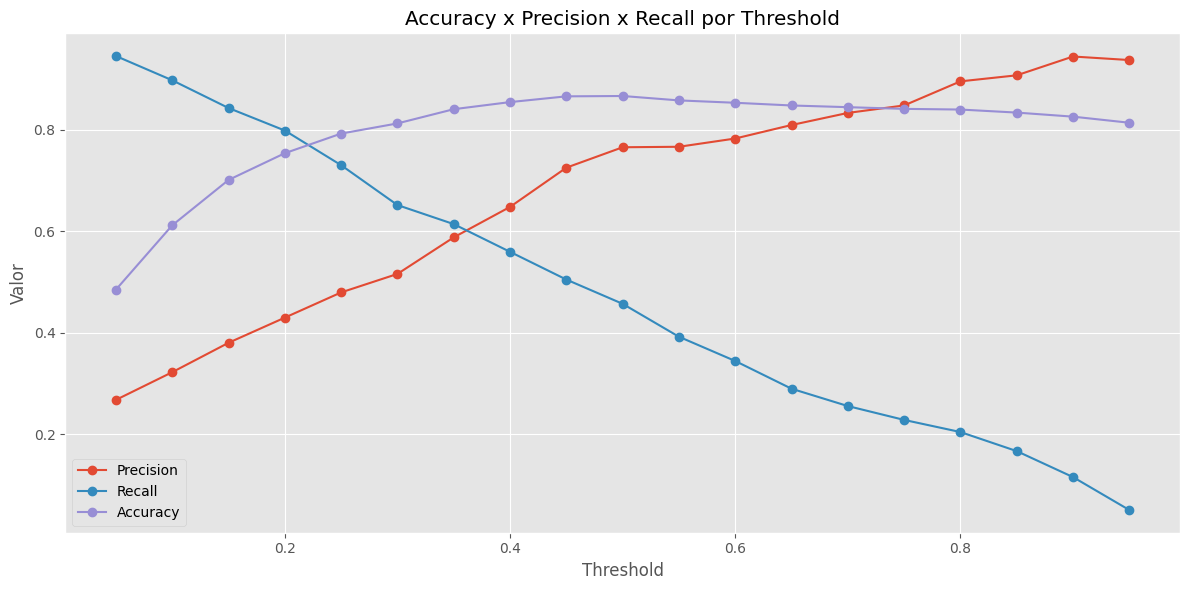

In [62]:
results = []

for thres in np.arange(0.05, 1, 0.05):
    
    y_pred = (model.predict_proba(X_test)[:,1]>thres)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    results.append((thres, precision, recall, f1, acc))

results_df = pd.DataFrame(results, columns=["thres", "precision", "recall", "f1", "acc"])


plt.figure(figsize=(12, 6))

plt.plot(results_df["thres"], results_df["precision"], label="Precision", marker='o')
plt.plot(results_df["thres"], results_df["recall"], label="Recall", marker='o')
plt.plot(results_df["thres"], results_df["acc"], label="Accuracy", marker='o')

plt.title("Accuracy x Precision x Recall por Threshold")
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Melhor threshold: 0.2 ~ 0.25

In [67]:
thres = 0.25

y_pred = (model.predict_proba(X_test)[:,1]>thres)
print(f'Acurracia: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')
print(f'Preision: {precision_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')

Acurracia: 0.7926666666666666
F1-score: 0.5791610284167794
Preision: 0.4798206278026906
recall: 0.7303754266211604


Vamos analisar as correlações entre as features para tentar tirar algum insight

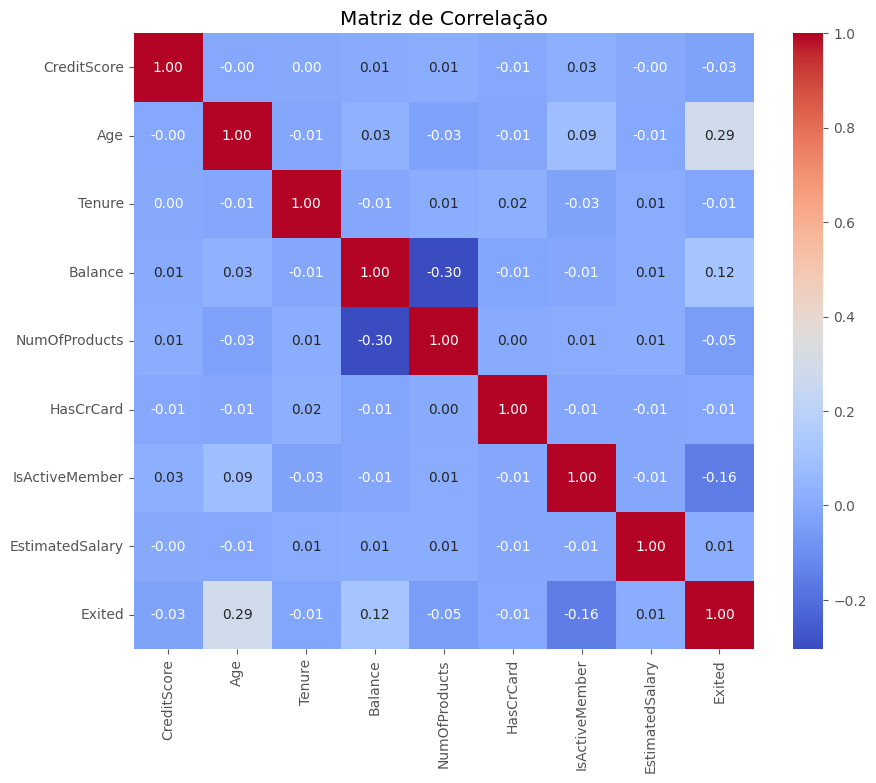

In [63]:
correlation_matrix = churn[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Temos um dataset com pouquissima correlação entre as features e o target, vamos tentar a adição de polynomialFeatures para tentar criar algumas correlações lineares(ATT: houve melhoria considerável)

# Logistic Regression

## Fit

In [ ]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', LogisticRegression())
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Surname', 'Geography',
                                                   'Gender'])])),
                ('classificador', LogisticRegression())])

## Metrics

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8106666666666666
F1 Score: 0.30049261083743845
Precision: 0.5398230088495575
Recall: 0.20819112627986347


In [ ]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[1155   52]
 [ 232   61]]


# Naive Bayes

## Fit

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', GaussianNB())
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Surname', 'Geography',
                                                   'Gender'])])),
                ('classificador', GaussianNB())])

## Metrics

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.332
F1 Score: 0.3022284122562674
Precision: 0.18985126859142606
Recall: 0.7406143344709898


In [ ]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[281 926]
 [ 76 217]]


# KNN

## Fit

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', KNeighborsClassifier())
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Surname', 'Geography',
                                                   'Gender'])])),
                ('classificador', KNeighborsClassifier())])

## Metrics

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8413333333333334
F1 Score: 0.5122950819672131
Precision: 0.6410256410256411
Recall: 0.42662116040955633


In [ ]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[1137   70]
 [ 168  125]]
